# DIC LAB 3 Problem 2 : KNN algorithm on German Credit Data

Load the libraries

In [1]:
library(ggplot2)
library(dplyr)
library(FNN)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



A function which takes in the data and sampling rate and returns a data frame containg different sampling rate , mis-calssification rate and k value which are obtained by running the KNN algorithm

In [2]:
modifiedKNN = function(creditData,samplingRate){
        
    observations = data.frame(kVal = double(),samplingRateVal = double(),misClassificationRateVal = double())
    
    rowCount = nrow(creditData)
    
    trainingDataRowsCount = sample(1:rowCount, samplingRate * rowCount,replace=FALSE)
    trainingData = subset(creditData[trainingDataRowsCount, ], select = c(Age,Job,Credit.amount,Duration))
    trainingLabels = creditData$Credit.Risks[trainingDataRowsCount]
    
    testingDataRowsCount = setdiff(1:rowCount, trainingDataRowsCount)
    testingData = subset(creditData[testingDataRowsCount, ], select = c(Age,Job,Credit.amount,Duration))
    testingLabels = creditData$Credit.Risks[testingDataRowsCount]
    
    for(k in 3:20){
        predictedLabels = knn(trainingData, testingData, trainingLabels, k) 
        incorrectLabels = sum(predictedLabels != testingLabels)
        misClassificationRate = (incorrectLabels/length(testingDataRowsCount))*100
        
        tempResult = data.frame(kVal = k, samplingRateVal = samplingRate, misClassificationRateVal = misClassificationRate)
        observations = rbind(observations,tempResult)
    }
    return (observations)
}

Load the German Credit Data

In [3]:
creditData = read.csv(file="dataSets/german_credit_data1.csv", header=TRUE, sep=",")

Show the data 

In [4]:
head(creditData)

X.,Age,Sex,Job,Housing,Saving.accounts,Checking.account,Credit.amount,Duration,Purpose,Credit.Risks
0,67,male,2,own,NA,little,1169,6,radio/TV,1
1,22,female,2,own,little,moderate,5951,48,radio/TV,2
2,49,male,1,own,little,NA,2096,12,education,1
3,45,male,2,free,little,little,7882,42,furniture/equipment,1
4,53,male,2,free,little,little,4870,24,car,2
5,35,male,1,free,NA,NA,9055,36,education,1


Show the summary of the data

In [5]:
summary(creditData)

       X.             Age            Sex           Job        Housing   
 Min.   :  0.0   Min.   :19.00   female:310   Min.   :0.000   free:108  
 1st Qu.:249.8   1st Qu.:27.00   male  :690   1st Qu.:2.000   own :713  
 Median :499.5   Median :33.00                Median :2.000   rent:179  
 Mean   :499.5   Mean   :35.55                Mean   :1.904             
 3rd Qu.:749.2   3rd Qu.:42.00                3rd Qu.:2.000             
 Max.   :999.0   Max.   :75.00                Max.   :3.000             
                                                                        
   Saving.accounts Checking.account Credit.amount      Duration   
 little    :603    little  :274     Min.   :  250   Min.   : 4.0  
 moderate  :103    moderate:269     1st Qu.: 1366   1st Qu.:12.0  
 quite rich: 63    rich    : 63     Median : 2320   Median :18.0  
 rich      : 48    NA's    :394     Mean   : 3271   Mean   :20.9  
 NA's      :183                     3rd Qu.: 3972   3rd Qu.:24.0  
              

Select only the relevant data field from the given data

In [6]:
creditData = creditData %>% select(Age,Job,Credit.amount,Duration,Credit.Risks)

Remove all the data fields which are NA in the selected data

In [7]:
creditData = na.omit(creditData)

Show the data

In [8]:
head(creditData)

Age,Job,Credit.amount,Duration,Credit.Risks
67,2,1169,6,1
22,2,5951,48,2
49,1,2096,12,1
45,2,7882,42,1
53,2,4870,24,2
35,1,9055,36,1


Create a summary of the data again and check if there is any change or not 

In [9]:
summary(creditData)

      Age             Job        Credit.amount      Duration     Credit.Risks
 Min.   :19.00   Min.   :0.000   Min.   :  250   Min.   : 4.0   Min.   :1.0  
 1st Qu.:27.00   1st Qu.:2.000   1st Qu.: 1366   1st Qu.:12.0   1st Qu.:1.0  
 Median :33.00   Median :2.000   Median : 2320   Median :18.0   Median :1.0  
 Mean   :35.55   Mean   :1.904   Mean   : 3271   Mean   :20.9   Mean   :1.3  
 3rd Qu.:42.00   3rd Qu.:2.000   3rd Qu.: 3972   3rd Qu.:24.0   3rd Qu.:2.0  
 Max.   :75.00   Max.   :3.000   Max.   :18424   Max.   :72.0   Max.   :2.0  

Set a seed value

In [10]:
set.seed(1234)

This is the main function which will tell us the various predicted values generated by applying the KNN algorithm depending upon k value and samoling rate 

In [11]:
observations = data.frame(kVal = double(),samplingRateVal = double(),misClassificationRateVal = double())

for(samplingRate in seq(0.5, 0.9, by = 0.1)){
    tempResult = modifiedKNN(creditData,samplingRate)
    observations = rbind(observations,tempResult)
}

Print the observations we get from different values of sampling rates and k values

In [12]:
observations

kVal,samplingRateVal,misClassificationRateVal
3,0.5,38.20
4,0.5,34.80
5,0.5,39.00
6,0.5,33.40
7,0.5,35.00
8,0.5,30.60
9,0.5,33.40
10,0.5,31.40
11,0.5,32.40
12,0.5,30.60


Draw a plot showing the different values

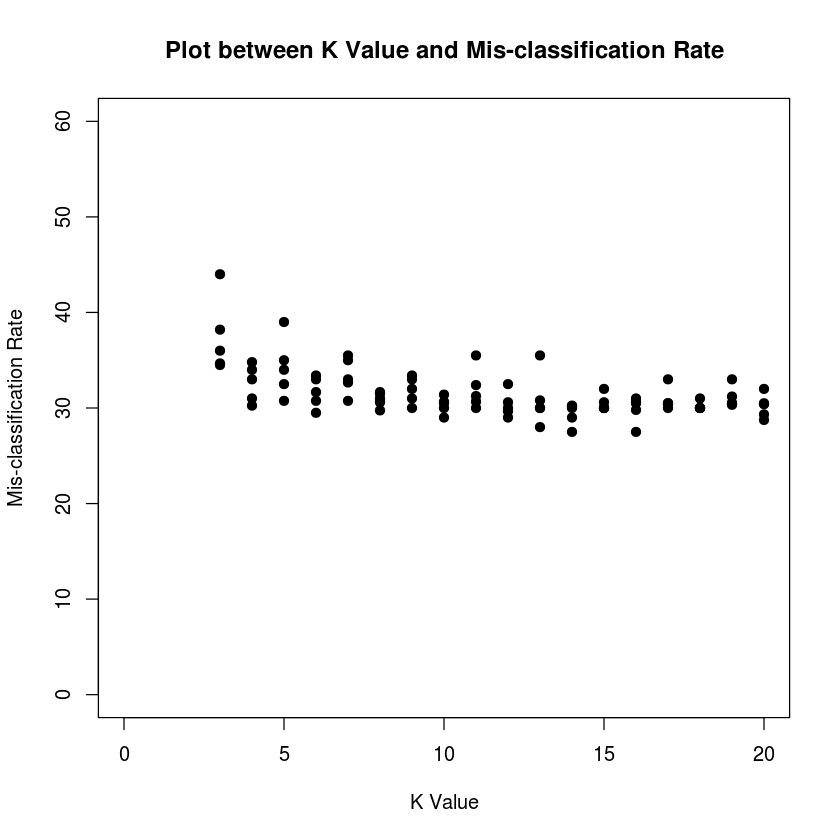

In [13]:
plot(observations$kVal,observations$misClassificationRateVal, pch=19, xlim=c(0,20), ylim=c(0,60),xlab="K Value", ylab="Mis-classification Rate",main="Plot between K Value and Mis-classification Rate")

Arrange the values otained above in the asending order of mis-classification values

In [14]:
minObservations = observations %>%
    arrange(misClassificationRateVal)

Show the values

In [15]:
minObservations

kVal,samplingRateVal,misClassificationRateVal
14,0.8,27.50000
16,0.8,27.50000
13,0.9,28.00000
20,0.6,28.75000
10,0.9,29.00000
12,0.9,29.00000
14,0.9,29.00000
20,0.7,29.33333
6,0.8,29.50000
12,0.7,29.66667


# Conclusion 
As we can see from the above data that that the lowest mis-classification rate is obtained when the sampling rate is 0.8 and k value is 14 and 16

# Normalization 

Here we will do a normalization based on the min max normalization. As we can see from the above data that the data values in Credit amount and Job varies a lot . So maybe by normalization we can obtain a better fit to the model

Define a Min Max normalization function

In [16]:
minMaxNormalization <- function(x) {
    return ((x - min(x)) / (max(x) - min(x)))
  }

Normalize the data except the Credit Risk data since those are our labels

In [17]:
normCreditData = as.data.frame(lapply(creditData[,1:4], minMaxNormalization))
normCreditData$Credit.Risks = creditData$Credit.Risks

Show the data after normalization

In [18]:
head(normCreditData)

Age,Job,Credit.amount,Duration,Credit.Risks
0.85714286,0.6666667,0.05056674,0.02941176,1
0.05357143,0.6666667,0.31368989,0.64705882,2
0.53571429,0.3333333,0.10157368,0.11764706,1
0.46428571,0.6666667,0.41994057,0.55882353,1
0.60714286,0.6666667,0.25420931,0.29411765,2
0.28571429,0.3333333,0.48448333,0.47058824,1


Set the seed value

In [19]:
set.seed(2137)

This is the main function which will tell us the various predicted values generated by applying the KNN algorithm depending upon k value and sampling rate 

In [20]:
observationsNorm = data.frame(kVal = double(),samplingRateVal = double(),misClassificationRateVal = double())

for(samplingRate in seq(0.5, 0.9, by = 0.1)){
    tempResultNorm = modifiedKNN(normCreditData,samplingRate)
    observationsNorm = rbind(observationsNorm,tempResultNorm)
}

Show the data obtained from the above run

In [21]:
observationsNorm

kVal,samplingRateVal,misClassificationRateVal
3,0.5,33.60
4,0.5,30.80
5,0.5,32.20
6,0.5,30.80
7,0.5,31.80
8,0.5,30.20
9,0.5,31.40
10,0.5,30.80
11,0.5,30.20
12,0.5,30.60


Plot the data for various k values and mis- classification rate

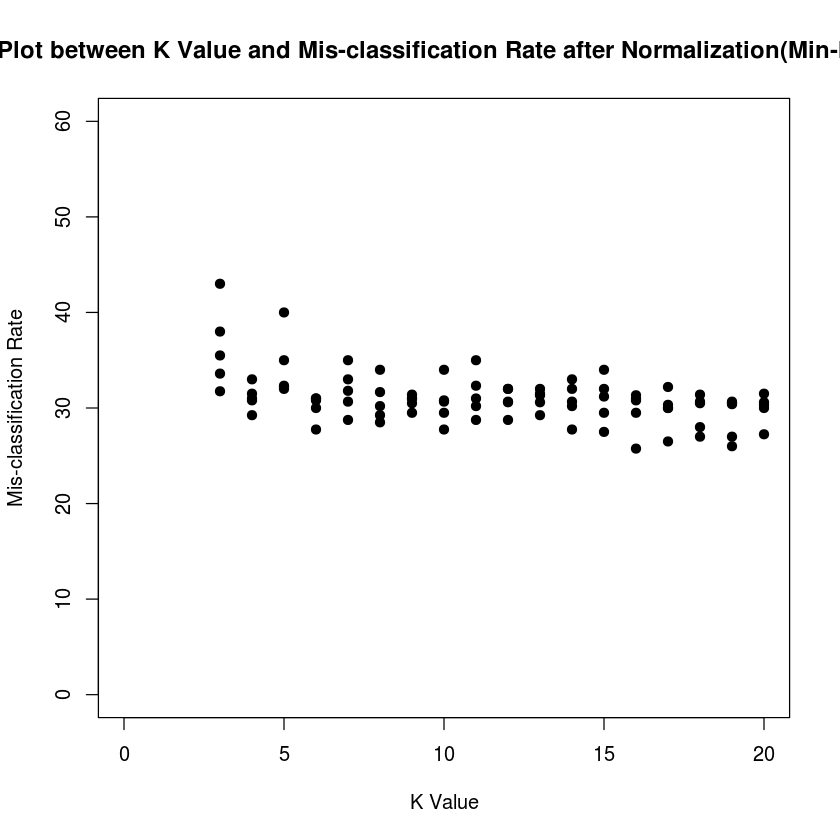

In [22]:
plot(observationsNorm$kVal,observationsNorm$misClassificationRateVal, pch=19, xlim=c(0,20), ylim=c(0,60),xlab="K Value", ylab="Mis-classification Rate",main="Plot between K Value and Mis-classification Rate after Normalization(Min-Max)")

Sort the data in ascending order of mis-classification rate

In [23]:
minObservationsNorm = observationsNorm %>% 
    arrange(misClassificationRateVal)

Show the data

In [24]:
minObservationsNorm

kVal,samplingRateVal,misClassificationRateVal
16,0.6,25.75000
19,0.9,26.00000
17,0.6,26.50000
18,0.6,27.00000
19,0.6,27.00000
20,0.6,27.25000
15,0.6,27.50000
6,0.6,27.75000
10,0.6,27.75000
14,0.6,27.75000


# Conclusion 
After normalization the mis-classification rate is reduced. So our hypothesis of normalizing the data was good.
As we can see from the above data that that the lowest mis-classification rate is obtained when the sampling rate is 0.6 and k value is 16.

# References

1. http://www.learnbymarketing.com/tutorials/k-nearest-neighbors-in-r-example/
2. https://rstudio-pubs-static.s3.amazonaws.com/123438_3b9052ed40ec4cd2854b72d1aa154df9.html
3. Class Notes